In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from pprint import pprint 

from modelOCR import numericalDetectron2, boundingBoxesDetectron2, alphabeticalDetectron2, easypredict
from drawer import DrawOCR

from config import cfg

# See the config 

In [2]:
# Only use one GPU for prediction
for key in cfg.keys():
    if 'list_cuda' in cfg[key]:
        cfg[key]['list_cuda'] = [0]

# Load Drawer

In [3]:
# load drawer classes
drawer_ocr = DrawOCR(cfg['drawOCR'])

# Example boundingBoxesDetectron2

In [4]:
# load boundingBoxesDetectron2 classes
bBoxDet = boundingBoxesDetectron2(cfg['boundingBoxesDetectron2'])

In [5]:
# read image and predict bounding boxes of that image
im = cv2.imread("assets/ktp_example.jpg")

# crops is np.array of cropped images, boxes is (x1, y1, x2, y2) of cropped images, labels is name of cropped images
# note if you want to predict sim change `input_type` hyperparameters into "sim", default is "ktp".
crops_ktp, boxes_ktp, labels_ktp = bBoxDet.predict(im, input_type="ktp")

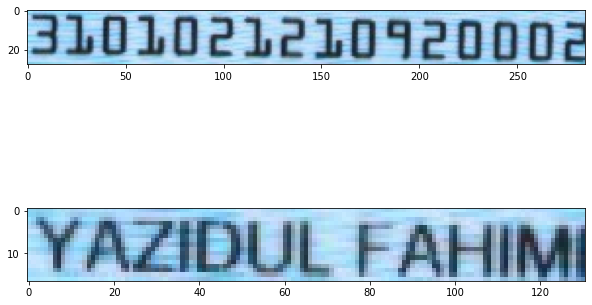

In [6]:
# you can list any image np.arrays here, for examples we just draw cropped images
drawer_ocr.show_list_images(list_img=crops_ktp.values())

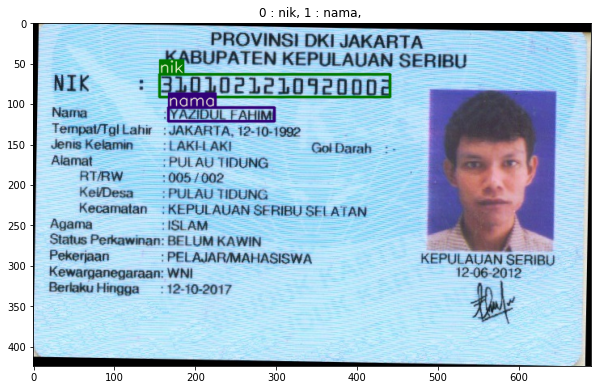

In [7]:
# draw bounding boxes in original image. labels is for the name of boxes
drawer_ocr.plot_bboxes(im, boxes_ktp, labels_ktp)

In [8]:
# read image and predict bounding boxes of that image
im2 = cv2.imread("assets/sim_example.jpg")

# crops is np.array of cropped images, boxes is (x1, y1, x2, y2) of cropped images, labels is name of cropped images
# note if you want to predict sim change `input_type` hyperparameters into "sim", default is "ktp".
crops_sim, boxes_sim, labels_sim = bBoxDet.predict(im2, input_type="sim")


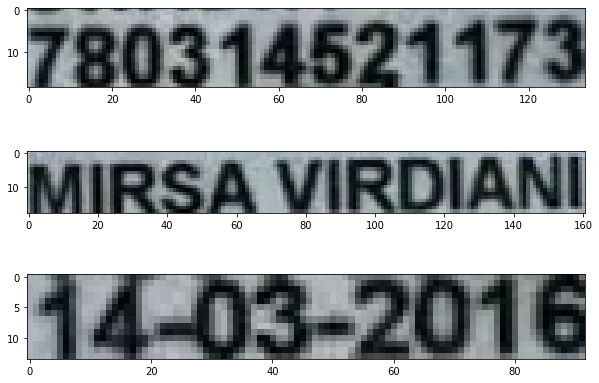

In [9]:
# you can list any image np.arrays here, for examples we just draw cropped images
drawer_ocr.show_list_images(list_img = crops_sim.values())

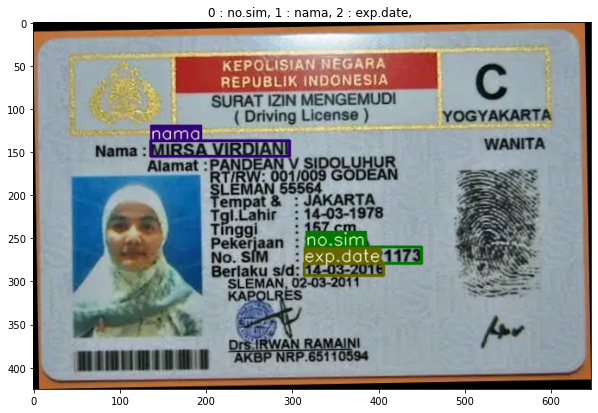

In [10]:
# draw bounding boxes in original image. labels is for the name of boxes
drawer_ocr.plot_bboxes(im2, boxes_sim, labels_sim)

# Example numericalDetectron2

In [11]:
# load numericalDetectron2 classes
numDet = numericalDetectron2(cfg['numericalDetectron2'])

In [12]:
# predict using multiple model inside numericalDetectron2, its okay if the numDet only have single detectron2 model.
dict_ensemble_idKTP = numDet.predict_ensemble(crops_ktp[0])
dict_ensemble_idSIM = numDet.predict_ensemble(crops_sim[0])

In [13]:
# hardvote_word : majority vote from each prediction, word level
# harvote_char : majority vote from each prediction, char level
# softvote_char : weighted vote from each prediction (using score prediction), char level
# softvote_word : weighted vote from each prediction (using score prediction), word level
# weighted_hardvote_word : weighted vote from each prediction (using model_weights), word level
# weighted_hardvote_char : weighted vote from each prediction (using model_weights), char level
# weighted_softvote_char : weighted vote from each prediction (using model_weights), char level
# print(dict_ensemble_idKTP, "\n\n", dict_ensemble_idSIM)

pprint(dict_ensemble_idKTP)
pprint(dict_ensemble_idSIM)

{'hardvote_char': '3101021210920002',
 'hardvote_word': '3101021210920002',
 'softvote_char': '3101021210920002',
 'softvote_word': '3101021210920002',
 'weighted_hardvote_char': '3101021210920002',
 'weighted_hardvote_word': '3101021210920002',
 'weighted_softvote_char': '3101021210920002'}
{'hardvote_char': '780314521173',
 'hardvote_word': '780314521173',
 'softvote_char': '780314521173',
 'softvote_word': '780314521173',
 'weighted_hardvote_char': '780314521173',
 'weighted_hardvote_word': '780314521173',
 'weighted_softvote_char': '780314521173'}


result ktp :  3101021210920002
result sim :  780314521173


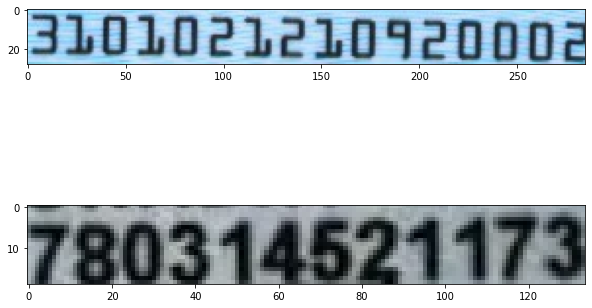

In [14]:
# according to our benchmark, the best result is on weighted_hardvote_word
print("result ktp : ", dict_ensemble_idKTP['weighted_hardvote_word'])
print("result sim : ", dict_ensemble_idSIM['weighted_hardvote_word'])

drawer_ocr.show_list_images(list_img=[crops_ktp[0], crops_sim[0]])

# Example alphabeticalDetectron2

In [15]:
# load alphabeticalcalDetectron2 classes
alphaDet = alphabeticalDetectron2(cfg['alphabeticalDetectron2'])

In [16]:
# predict using multiple model inside numericalDetectron2, its okay if the numDet only have single detectron2 model.
dict_ensemble_namaKTP = alphaDet.predict_ensemble(crops_ktp[1])
dict_ensemble_namaSIM = alphaDet.predict_ensemble(crops_sim[1])

In [17]:
# hardvote_word : majority vote from each prediction, word level
# harvote_char : majority vote from each prediction, char level
# softvote_char : weighted vote from each prediction (using score prediction), char level
# softvote_word : weighted vote from each prediction (using score prediction), word level
# weighted_hardvote_word : weighted vote from each prediction (using model_weights), word level
# weighted_hardvote_char : weighted vote from each prediction (using model_weights), char level
# weighted_softvote_char : weighted vote from each prediction (using model_weights), char level

pprint(dict_ensemble_namaKTP)
pprint(dict_ensemble_namaSIM)

{'hardvote_char': 'YAZIDUL FAHIMI',
 'hardvote_word': 'YAZIDUL FAHIMI',
 'softvote_char': 'YAZIDUL FAHIMI',
 'softvote_word': 'YAZIDUL FAHIMI',
 'weighted_hardvote_char': 'YAZIDUL FAHIMI',
 'weighted_hardvote_word': 'YAZIDUL FAHIMI',
 'weighted_softvote_char': 'YAZIDUL FAHIMI'}
{'hardvote_char': 'MIRSA VIRDIANI',
 'hardvote_word': 'MIRSA VIRDIANI',
 'softvote_char': 'MIRSA VIRDIANI',
 'softvote_word': 'MIRSA VIRDIANI',
 'weighted_hardvote_char': 'MIRSA VIRDIANI',
 'weighted_hardvote_word': 'MIRSA VIRDIANI',
 'weighted_softvote_char': 'MIRSA VIRDIANI'}


result ktp :  YAZIDUL FAHIMI
result sim :  MIRSA VIRDIANI


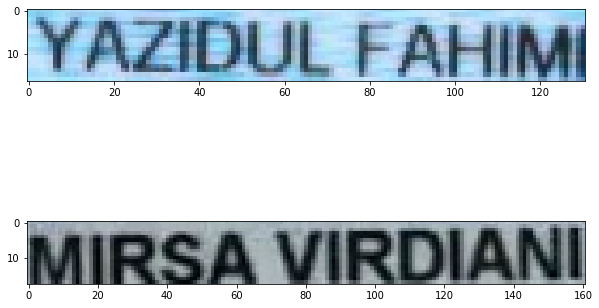

In [18]:
# according to our benchmark, the best result is on weighted_hardvote_word
print("result ktp : ", dict_ensemble_namaKTP['weighted_hardvote_word'])
print("result sim : ", dict_ensemble_namaSIM['weighted_hardvote_word'])

drawer_ocr.show_list_images(list_img=[crops_ktp[1], crops_sim[1]])

# Single PipeLine Example

In [19]:
# load classes
drawer_ocr = DrawOCR(cfg['drawOCR'])
bBoxDet = boundingBoxesDetectron2(cfg['boundingBoxesDetectron2'])
numDet = numericalDetectron2(cfg['numericalDetectron2'])
alphaDet = alphabeticalDetectron2(cfg['alphabeticalDetectron2'])

In [20]:
# load image
image_ktp = cv2.imread("assets/ktp_example.jpg")
image_sim = cv2.imread("assets/sim_example.jpg")

# detect boundingboxes
crops, boxes, labels = bBoxDet.predict(image_ktp, input_type='ktp')

# detect number and alphabet
dict_ID = numDet.predict_ensemble(crops[0])
dict_Name = alphaDet.predict_ensemble(crops[1])

# choose `weighted_hardvote_word` for the best result according to our benchmark
ID =  dict_ID.get("weighted_hardvote_word")
Name =  dict_Name.get("weighted_hardvote_word")

# parse NIK to get information about : location, gender, and birthdate
parse_NIK = numDet.parse_nik(ID)

# create listdata and listlabel for visualization later
listdata = [ID, Name]
listlabel = [x for x in list(labels.values()) if x is not None]
for label, data in parse_NIK.items():
    listdata.append(data)
    listlabel.append(label)

3101021210920002
YAZIDUL FAHIMI


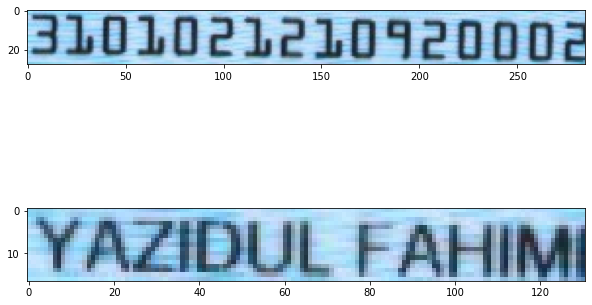

In [21]:
print(ID)
print(Name)

drawer_ocr.show_list_images(list_img=crops.values())

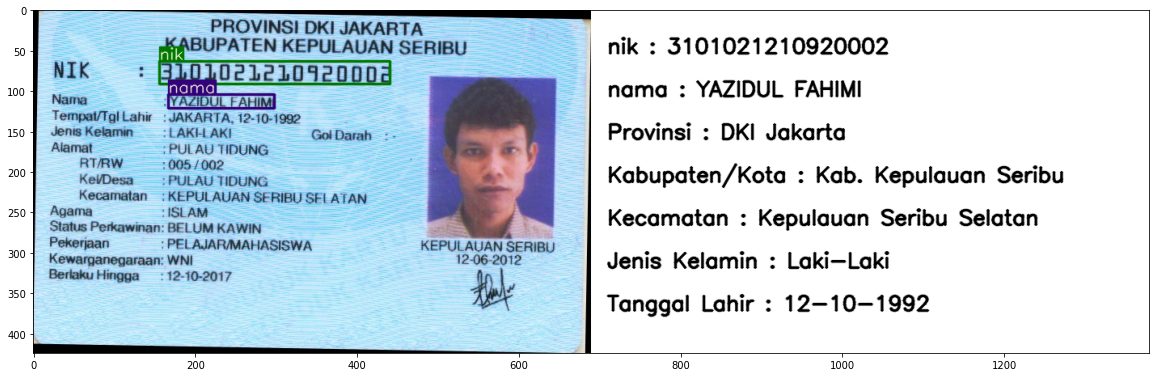

In [22]:
drawer_ocr.show_desc(image_ktp, boxes, labels, listdata, listlabel)

# EasyPredict

In [23]:
easypredict(image_ktp, bBoxDet, numDet, alphaDet, input_type='ktp')

{'input_type': 'ktp', 'id': '3101021210920002', 'name': 'YAZIDUL FAHIMI'}

In [24]:
easypredict(image_sim, bBoxDet, numDet, alphaDet, input_type='ktp')

{'input_type': 'ktp', 'name': 'JAKARTA'}